In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Download the dataset from kaggle

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d lizhecheng/mushroom-classification


 99% 1.06G/1.07G [00:12<00:00, 137MB/s]

100% 1.07G/1.07G [00:12<00:00, 95.4MB/s]


In [ ]:
!unzip mushroom-classification.zip -d mushroom-classification

In [ ]:
## Move the date set to Google Drive

In [ ]:
os.mkdir('/content/drive/MyDrive/mushrooms-classification')
!mv /content/mushroom-classification/archive/Mushrooms  /content/drive/MyDrive/mushrooms-classification

In [8]:
dataset_dir = '/kaggle/input/mushroom-classification/archive/Mushrooms/'

In [ ]:
os.remove("/kaggle/working/mushrooms-classification/archive/Mushrooms/092_43B354vYxm8.jpg")


In [9]:
## Calculate number of classes

In [10]:
classes = []
count  = []
for cls in os.listdir(dataset_dir):
  classes.append(cls)
  count.append(len([img for img in os.listdir(dataset_dir + cls)]))

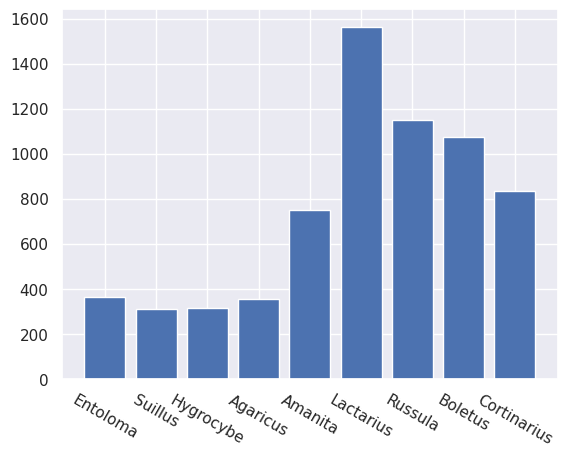

In [11]:
plt.bar(classes,count)
plt.xticks(rotation=-30)
plt.show()

It is evident that our dataset is suffering from class imbalance, with a significant disparity between all classes. Therefore, we need to address this issue carefully when splitting the data into training, validation, and testing sets.


In [12]:
## split data

In [13]:
os.mkdir('/kaggle/working/mushrooms-classification')

In [16]:
train_dir = '/kaggle/working/mushrooms-classification/train/'
val_dir   = '/kaggle/working/mushrooms-classification/val/'
test_dir  = '/kaggle/working/mushrooms-classification/test/'

In [17]:
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)
for i in range(len(classes)):
  ## split every class to 65% train, 20% val and 15% testing
  train_cnt,val_cnt,test_cnt = int(np.ceil(count[i] * 0.65)),int(count[i] * 0.2),int(np.ceil(count[i] * 0.15))
  try:
      os.mkdir(train_dir + classes[i])
      os.mkdir(val_dir   + classes[i])
      os.mkdir(test_dir  + classes[i])
  except:
        pass
  path = dataset_dir + classes[i] + '/'
  imgs = os.listdir(dataset_dir + classes[i] + '/')
  random.shuffle(imgs)
  for img in imgs:
    if train_cnt:
      shutil.copy(path + img ,train_dir + classes[i] + '/' + img)
      train_cnt -= 1
    elif val_cnt:
      shutil.copy(path + img ,val_dir + classes[i] + '/' + img)
      val_cnt -= 1
    elif test_cnt:
      shutil.copy(path + img ,test_dir + classes[i] + '/' + img)
      test_cnt -= 1

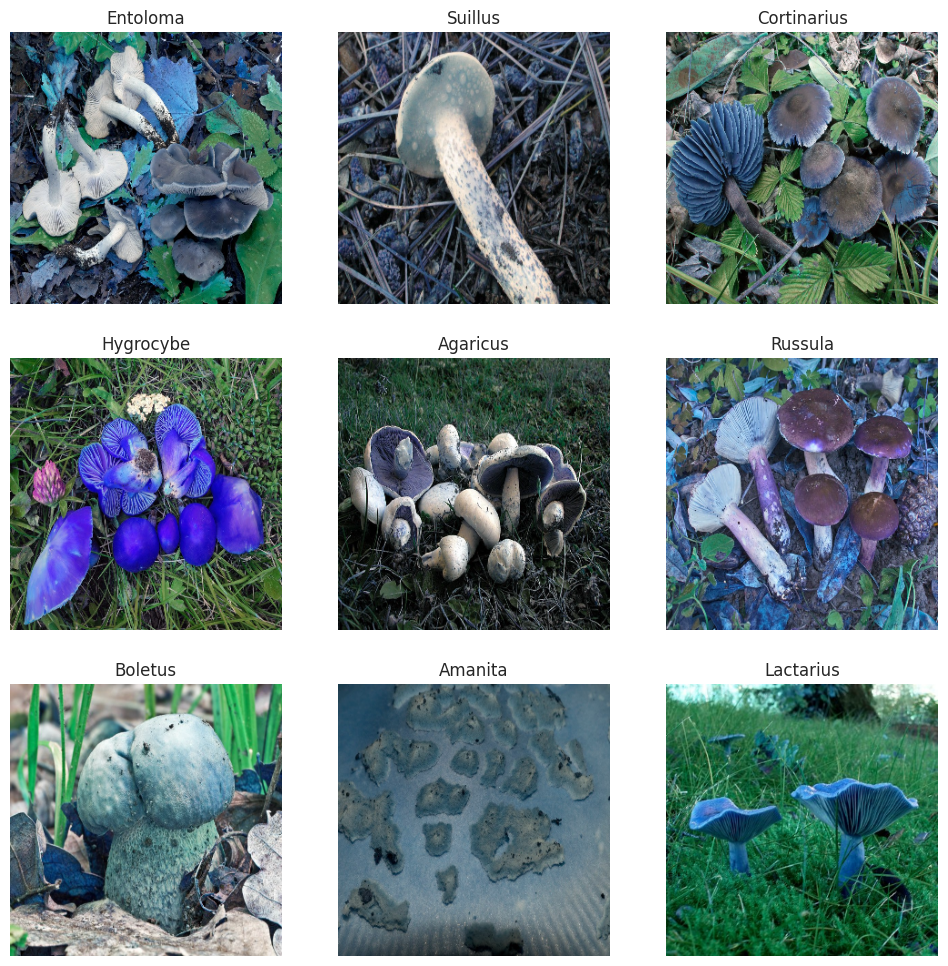

In [24]:
show_batch(cfg.model.train_dir)